# Derivatives

In [1]:
%pylab inline
import sympy

Populating the interactive namespace from numpy and matplotlib


First, a simple example.

Differentiate $x^{2}$

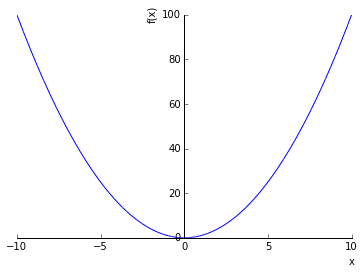

The  first derivative is 2*x


In [2]:
x = sympy.Symbol('x') # Define the symbol
func = x**2

#First plot
sympy.plotting.plot(func, (x, -10, 10))

#Then differentiate
deriv = sympy.diff(func, x)
print 'The  first derivative is {}'.format(deriv)

### Multiple derivitives
It is possible to take multiple derivatives using the same synatx.

Differentiate $x^{4} + 3x^{3} - 2x^{2} + 5$

In [3]:
func = x ** 4 + 3 * x ** 3 - 2 * x ** 2 + 5

#How many derivatives can we take before the result is 0?

print 'First derivative: {}'.format(sympy.diff(func, x))
print 'Second derivative: {}'.format(sympy.diff(func, x, x))
print 'Third derivative: {}'.format(sympy.diff(func, x, x, x))
print 'Fourth derivative: {}'.format(sympy.diff(func, x, x, x, x))
print 'Fifth derivative: {}'.format(sympy.diff(func, x, x, x, x, x))

First derivative: 4*x**3 + 9*x**2 - 4*x
Second derivative: 2*(6*x**2 + 9*x - 2)
Third derivative: 6*(4*x + 3)
Fourth derivative: 24
Fifth derivative: 0


### When the library fails us and we need to know what is happening under the hood
Now a slightly more complex example:

Differentiate $\frac{1}{7x^{2}}$

In [4]:
#This should fail with a TypeError stating: cannot determine truth value of x < 0
func = 1 / (7 * x ** 2)
diff(func, x)

TypeError: cannot determine truth value of
x < 0

Maybe plotting the function will help (though the $x$ in the denominator might be leaping off the screen).

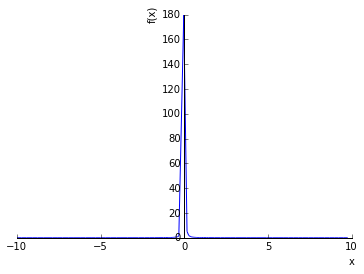

In [5]:
sympy.plotting.plot(func, (x, -10, 10))  
#The y-limit varies each time the cell is run, so don't be surprised if the values vary

In [6]:
#Maybe try factoring out the constants
func = 1 / x**2
#Then it appears sympy applies the power rule
deriv = sympy.diff(func,x)
deriv

-2/x**3

And then simplyify:

$\frac{1}{7} * (\frac{-2}{x^{3}})$

### Note: 
The important thing to note here is that the library provides a solution to most problems, but it is essential to understand _what_ is happening under the hood (or have a general idea of the implementation) and then you can start to answer _why_ something might not be working.

This is the reason to do these by hand first.

# Extrema
Finding extrema is a bit harder due to issues with numerical representation and issues of contraining bounds.

In [7]:
import scipy.optimize as optimize

In [8]:
def f(x):
    return -2 * x**2 + 4*x
max_x = optimize.fmin(lambda x: -f(x), 0)
print max_x

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 25
         Function evaluations: 50
[ 1.]


So, what is going on here?

1. We have to define the function (math) differently, because symbolic notation (sympy) does not natively support finding extrema.  This happens in the function (computer science):
        def f(x):
            return -2 * x**2 + 4*x
2. Next scipy.optimize is used to apply some search method to finding the minima of the function (`fmin`).  Note that we want the maxima, so $-f(x)$.
3. Finally, the scipy.optimize.fmin call takes a function as the first argument.  This is accomplished by passing in a lambda function.  The scipy call also needs an initial guess (we will see this much more after the midterm; the need to have an initial guess or initial feasible solution). 
